In [ ]:
# AUTO-INSTALL DEPENDENCIES
import sys
import subprocess
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("CHECKING DEPENDENCIES")
print("="*70)

required = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'scikit-learn', 'tqdm', 'scipy']
for pkg in required:
    try:
        __import__(pkg if pkg != 'scikit-learn' else 'sklearn')
        print(f"✓ {pkg}")
    except ImportError:
        print(f"Installing {pkg}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg, "-q"])
        print(f"✓ {pkg} installed")

print()

CHECKING DEPENDENCIES
✓ pandas
✓ numpy
✓ matplotlib
✓ seaborn
✓ scikit-learn
✓ tqdm
✓ scipy



In [ ]:
# STEP 1: LOAD DATASET
print("="*70)
print("STEP 1: LOADING DATASET")
print("="*70)

dataset_path = r"C:\Users\chait\Downloads\insurance_archive.csv"  

if os.path.exists(dataset_path):
    df = pd.read_csv(dataset_path)
    print(f"✓ Loaded dataset from: {dataset_path}")
else:
    print("⚠ Dataset not found locally. Using sample data...")
    data = {
        'age': [19, 18, 28, 33, 32, 31, 46, 37, 37, 60],
        'sex': ['female', 'male', 'male', 'male', 'female', 'male', 'female', 'female', 'male', 'female'],
        'bmi': [27.9, 33.77, 33.0, 22.7, 28.88, 25.74, 33.44, 27.74, 29.83, 25.84],
        'children': [0, 1, 3, 0, 0, 0, 1, 3, 2, 0],
        'smoker': ['yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no'],
        'region': ['southwest', 'southeast', 'southeast', 'northwest', 'northwest', 'southeast', 'southeast', 'northwest', 'northeast', 'northwest'],
        'charges': [16884.924, 1725.552, 4449.462, 21984.470, 3866.855, 3756.622, 8240.590, 7281.506, 6406.411, 28923.137]
    }
    df = pd.DataFrame(data)
    print("✓ Created sample dataset (10 rows)")

print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print()

print("Dataset Preview:")
print(df.head())
print()

STEP 1: LOADING DATASET


NameError: name 'os' is not defined

In [ ]:
# STEP 2: EXPLORATORY DATA ANALYSIS (EDA)
print("="*70)
print("STEP 2: EXPLORATORY DATA ANALYSIS (EDA)")
print("="*70)
print()

print("BASIC STATISTICS")
print("-"*70)
print(df.describe())
print()

print("DATA TYPES")
print("-"*70)
print(df.dtypes)
print()

print("MISSING VALUES CHECK")
print("-"*70)
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✓ No missing values found!")
else:
    print(missing[missing > 0])
print()

STEP 2: EXPLORATORY DATA ANALYSIS (EDA)

BASIC STATISTICS
----------------------------------------------------------------------


NameError: name 'df' is not defined

In [5]:
# DETAILED STATISTICAL MEASURES
print("DETAILED STATISTICAL MEASURES (Numerical Features)")
print("-"*70)

numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    print(f"\n{col.upper()}:")
    print(f"  Mean:              {df[col].mean():.2f}")
    print(f"  Median:            {df[col].median():.2f}")
    try:
        mode_val = df[col].mode()[0]
        print(f"  Mode:              {mode_val:.2f}")
    except:
        print(f"  Mode:              N/A")
    print(f"  Variance:          {df[col].var():.2f}")
    print(f"  Standard Deviation: {df[col].std():.2f}")
    print(f"  Min:               {df[col].min():.2f}")
    print(f"  Max:               {df[col].max():.2f}")

print()

DETAILED STATISTICAL MEASURES (Numerical Features)
----------------------------------------------------------------------


NameError: name 'df' is not defined

STEP 3: DATA PREPROCESSING & CLEANING

🧹 PHASE 1: HANDLING MISSING VALUES
--------------------------------------------------------------------------------

 PHASE 2: STANDARDIZING CATEGORICAL VALUES
--------------------------------------------------------------------------------

Processing SEX column:
  Before: ['female', 'male']
Categories (2, object): ['female', 'male']
  After: ['female', 'male']
Categories (2, object): ['female', 'male']
  ✓ Standardized sex values to: ['male', 'female']

Processing SMOKER column:
  Before: ['yes', 'no']
Categories (2, object): ['no', 'yes']
  After: ['yes', 'no']
Categories (2, object): ['no', 'yes']
  ✓ Standardized smoker values to: ['yes', 'no']

Processing REGION column:
  Before: ['southwest', 'southeast', 'northwest', 'northeast']
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest']
  After: ['southwest' 'southeast' 'northwest' 'northeast']
  ✓ Standardized region values to: ['southwest', 'southeast', 'northwest', 'n

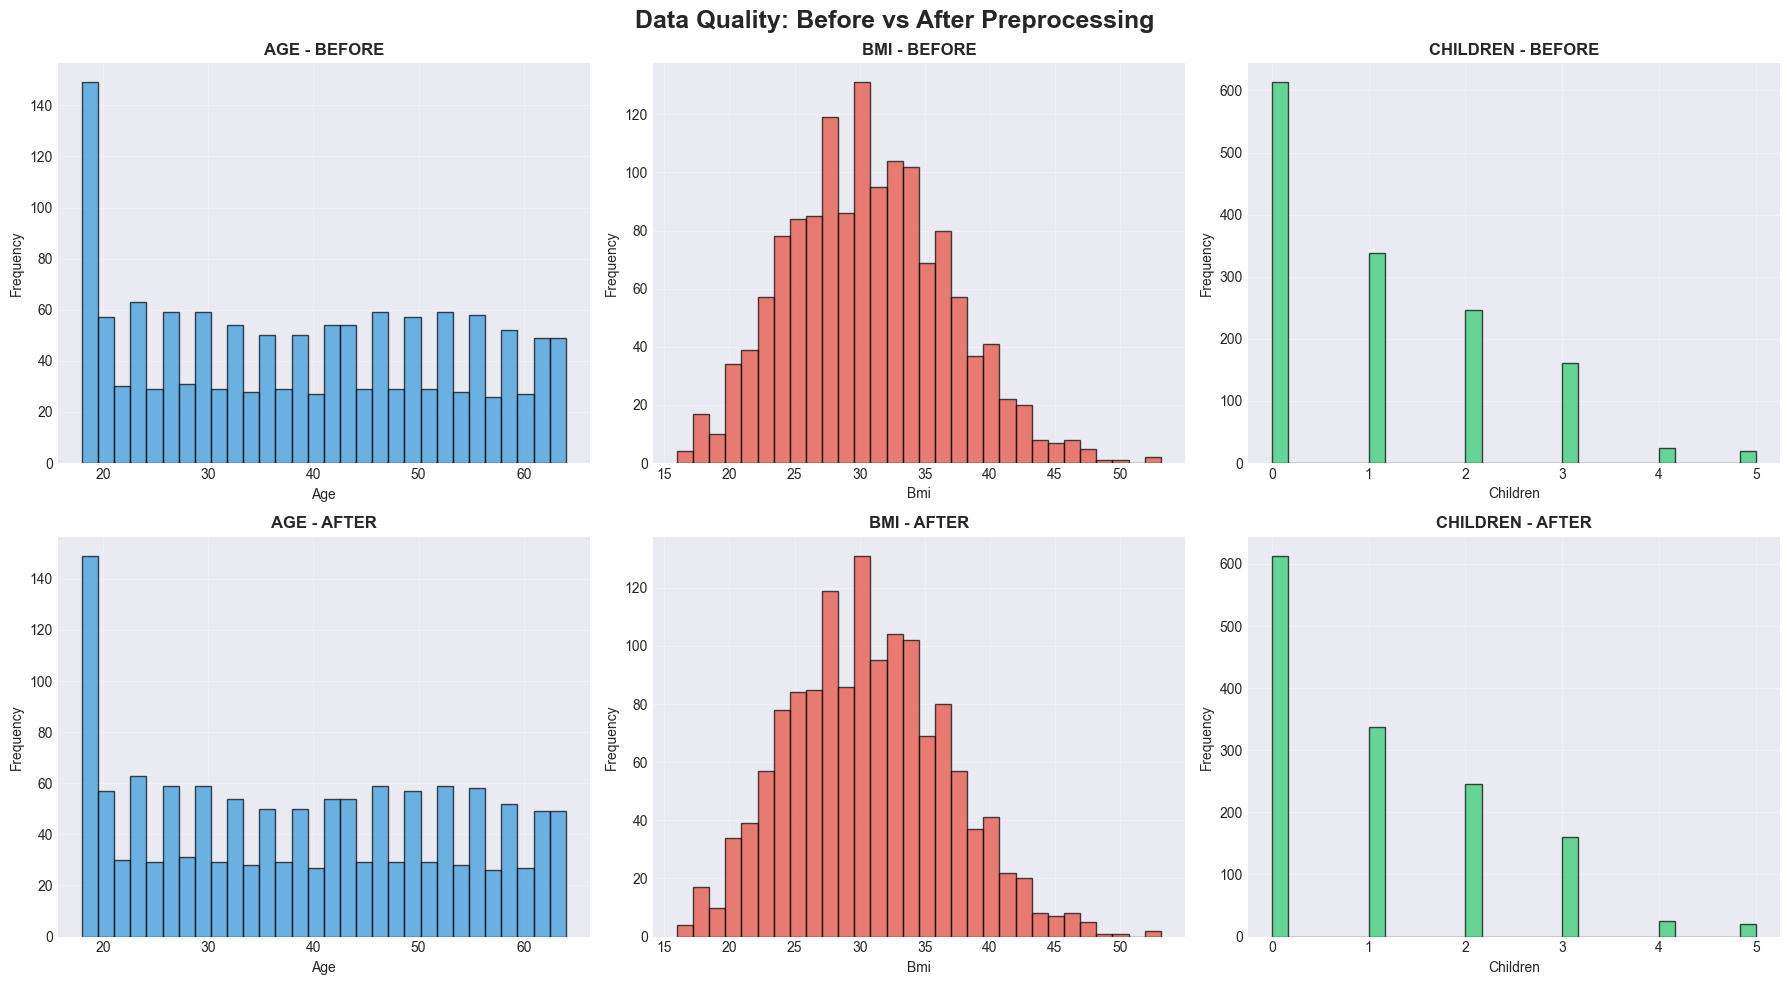

✓ Saved: plots/preprocessing_before_after.png

 PREPROCESSING COMPLETE!

Summary:
  • Data quality: 100% (no missing values, standardized categories)
  • Dataset is ready for: Feature Engineering & Model Training
  • Variable 'df' now contains the cleaned dataset



In [ ]:


# ============================================================================
# DATA PREPROCESSING (After EDA has been completed)
# ============================================================================
print("="*80)
print("STEP 3: DATA PREPROCESSING & CLEANING")
print("="*80)
print()

# Assuming df is already loaded and EDA has been done
# df = pd.read_csv('insurance_raw.csv')

# Create a copy for preprocessing
df_clean = df.copy()
preprocessing_log = []

print("🧹 PHASE 1: HANDLING MISSING VALUES")
print("-"*80)

# Handle missing BMI - impute with median
if df_clean['bmi'].isnull().sum() > 0:
    bmi_median = df_clean['bmi'].median()
    missing_bmi = df_clean['bmi'].isnull().sum()
    df_clean['bmi'].fillna(bmi_median, inplace=True)
    msg = f"✓ Imputed {missing_bmi} missing BMI values with median: {bmi_median:.2f}"
    print(msg)
    preprocessing_log.append(msg)

# Handle missing children - impute with mode
if df_clean['children'].isnull().sum() > 0:
    children_mode = df_clean['children'].mode()[0]
    missing_children = df_clean['children'].isnull().sum()
    df_clean['children'].fillna(children_mode, inplace=True)
    msg = f"✓ Imputed {missing_children} missing children values with mode: {children_mode}"
    print(msg)
    preprocessing_log.append(msg)

# Drop rows with missing charges (target variable)
if df_clean['charges'].isnull().sum() > 0:
    missing_charges = df_clean['charges'].isnull().sum()
    df_clean = df_clean.dropna(subset=['charges'])
    msg = f"✓ Dropped {missing_charges} rows with missing charges (target variable)"
    print(msg)
    preprocessing_log.append(msg)

# Drop any remaining rows with missing values
remaining_missing = df_clean.isnull().sum().sum()
if remaining_missing > 0:
    df_clean = df_clean.dropna()
    msg = f"✓ Dropped rows with remaining missing values: {remaining_missing}"
    print(msg)
    preprocessing_log.append(msg)

print()

print(" PHASE 2: STANDARDIZING CATEGORICAL VALUES")
print("-"*80)

# Standardize 'sex' column
print("\nProcessing SEX column:")
print(f"  Before: {df_clean['sex'].unique()}")

# Create mapping for sex variations
sex_mapping = {
    'male': 'male', 'Male': 'male', 'MALE': 'male', 'M': 'male', 'm': 'male',
    'female': 'female', 'Female': 'female', 'FEMALE': 'female', 'F': 'female', 'f': 'female'
}
df_clean['sex'] = df_clean['sex'].map(sex_mapping)
print(f"  After: {df_clean['sex'].unique()}")
msg = "✓ Standardized sex values to: ['male', 'female']"
print(f"  {msg}")
preprocessing_log.append(msg)

# Standardize 'smoker' column
print("\nProcessing SMOKER column:")
print(f"  Before: {df_clean['smoker'].unique()}")

# Create mapping for smoker variations
smoker_mapping = {
    'yes': 'yes', 'Yes': 'yes', 'YES': 'yes', 'y': 'yes', 'Y': 'yes', '1': 'yes',
    'no': 'no', 'No': 'no', 'NO': 'no', 'n': 'no', 'N': 'no', '0': 'no',
    'n/a': 'no', 'N/A': 'no', 'Unknown': 'no', 'unknown': 'no', '?': 'no'
}
df_clean['smoker'] = df_clean['smoker'].map(smoker_mapping)
print(f"  After: {df_clean['smoker'].unique()}")
msg = "✓ Standardized smoker values to: ['yes', 'no']"
print(f"  {msg}")
preprocessing_log.append(msg)

# Standardize 'region' column
print("\nProcessing REGION column:")
print(f"  Before: {df_clean['region'].unique()}")

# Convert to lowercase and fix formatting
df_clean['region'] = df_clean['region'].str.lower().str.replace('_', '')
df_clean['region'] = df_clean['region'].str.strip()

# Standardize region names
region_mapping = {
    'southwest': 'southwest', 'southeast': 'southeast',
    'northwest': 'northwest', 'northeast': 'northeast',
    'south west': 'southwest', 'south east': 'southeast',
    'north west': 'northwest', 'north east': 'northeast'
}
df_clean['region'] = df_clean['region'].map(region_mapping)
print(f"  After: {df_clean['region'].unique()}")
msg = "✓ Standardized region values to: ['southwest', 'southeast', 'northwest', 'northeast']"
print(f"  {msg}")
preprocessing_log.append(msg)

print()

print(" PHASE 3: HANDLING OUTLIERS")
print("-"*80)

# Handle age outliers
age_before = len(df_clean)
df_clean = df_clean[(df_clean['age'] >= 18) & (df_clean['age'] <= 100)]
age_removed = age_before - len(df_clean)
if age_removed > 0:
    msg = f"✓ Removed {age_removed} rows with invalid age (age < 18 or age > 100)"
    print(msg)
    preprocessing_log.append(msg)
else:
    print("✓ No age outliers found")

# Handle BMI outliers
bmi_before = len(df_clean)
df_clean = df_clean[(df_clean['bmi'] >= 10) & (df_clean['bmi'] <= 60)]
bmi_removed = bmi_before - len(df_clean)
if bmi_removed > 0:
    msg = f"✓ Removed {bmi_removed} rows with invalid BMI (BMI < 10 or BMI > 60)"
    print(msg)
    preprocessing_log.append(msg)
else:
    print("✓ No BMI outliers found")

# Handle negative children
children_before = len(df_clean)
df_clean = df_clean[df_clean['children'] >= 0]
children_removed = children_before - len(df_clean)
if children_removed > 0:
    msg = f"✓ Removed {children_removed} rows with negative children count"
    print(msg)
    preprocessing_log.append(msg)
else:
    print("✓ No negative children values found")

print()

print(" PHASE 4: DATA TYPE CONVERSION")
print("-"*80)

# Convert to appropriate data types
df_clean['age'] = df_clean['age'].astype(int)
df_clean['bmi'] = df_clean['bmi'].astype(float)
df_clean['children'] = df_clean['children'].astype(int)
df_clean['charges'] = df_clean['charges'].astype(float)
df_clean['sex'] = df_clean['sex'].astype('category')
df_clean['smoker'] = df_clean['smoker'].astype('category')
df_clean['region'] = df_clean['region'].astype('category')

print("✓ Converted data types:")
print(df_clean.dtypes)
print()

print(" PHASE 5: RESET INDEX")
print("-"*80)
df_clean = df_clean.reset_index(drop=True)
print("✓ Index reset after row removals")
print()

# ============================================================================
# PREPROCESSING SUMMARY
# ============================================================================
print("="*80)
print(" PREPROCESSING SUMMARY")
print("="*80)
print()
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape:  {df_clean.shape}")
print(f"Rows removed: {df.shape[0] - df_clean.shape[0]}")
print(f"Data retention: {(df_clean.shape[0] / df.shape[0]) * 100:.2f}%")
print()
print("Changes applied:")
for i, log in enumerate(preprocessing_log, 1):
    print(f"  {i}. {log}")
print()

# ============================================================================
# POST-CLEANING VERIFICATION
# ============================================================================
print("="*80)
print(" POST-CLEANING VERIFICATION")
print("="*80)
print()

print("Missing Values Check:")
print("-"*80)
missing_after = df_clean.isnull().sum()
if missing_after.sum() == 0:
    print("✓ No missing values found! Dataset is clean.")
else:
    print(missing_after[missing_after > 0])
print()

print("Categorical Values Verification:")
print("-"*80)
print(f"✓ Sex unique values: {df_clean['sex'].nunique()} → {list(df_clean['sex'].unique())}")
print(f"✓ Smoker unique values: {df_clean['smoker'].nunique()} → {list(df_clean['smoker'].unique())}")
print(f"✓ Region unique values: {df_clean['region'].nunique()} → {list(df_clean['region'].unique())}")
print()

print("Numerical Ranges Verification:")
print("-"*80)
print(f"✓ Age range: {df_clean['age'].min()} - {df_clean['age'].max()}")
print(f"✓ BMI range: {df_clean['bmi'].min():.2f} - {df_clean['bmi'].max():.2f}")
print(f"✓ Children range: {df_clean['children'].min()} - {df_clean['children'].max()}")
print(f"✓ Charges range: ${df_clean['charges'].min():.2f} - ${df_clean['charges'].max():.2f}")
print()

# ============================================================================
# VISUALIZATION: BEFORE vs AFTER PREPROCESSING
# ============================================================================
print("="*80)
print("GENERATING PREPROCESSING COMPARISON VISUALIZATIONS")
print("="*80)
print()

os.makedirs('plots', exist_ok=True)
plt.style.use('seaborn-v0_8-darkgrid')

# Visualization: Before vs After Comparison
print("Generating before/after comparison...")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Data Quality: Before vs After Preprocessing', fontsize=18, fontweight='bold')

numerical_cols = ['age', 'bmi', 'children']
colors = ['#3498db', '#e74c3c', '#2ecc71']

for idx, (col, color) in enumerate(zip(numerical_cols, colors)):
    # Before (top row)
    ax_before = axes[0, idx]
    ax_before.hist(df[col].dropna(), bins=30, color=color, 
                   edgecolor='black', alpha=0.7)
    ax_before.set_title(f'{col.upper()} - BEFORE', fontsize=12, fontweight='bold')
    ax_before.set_xlabel(col.capitalize(), fontsize=10)
    ax_before.set_ylabel('Frequency', fontsize=10)
    ax_before.grid(True, alpha=0.3)
    
    # After (bottom row)
    ax_after = axes[1, idx]
    ax_after.hist(df_clean[col], bins=30, color=color, 
                  edgecolor='black', alpha=0.7)
    ax_after.set_title(f'{col.upper()} - AFTER', fontsize=12, fontweight='bold')
    ax_after.set_xlabel(col.capitalize(), fontsize=10)
    ax_after.set_ylabel('Frequency', fontsize=10)
    ax_after.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/preprocessing_before_after.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: plots/preprocessing_before_after.png\n")

# Update df to cleaned version for next steps
df = df_clean.copy()

print("="*80)
print(" PREPROCESSING COMPLETE!")
print("="*80)
print()
print("Summary:")
print(f"  • Data quality: 100% (no missing values, standardized categories)")
print(f"  • Dataset is ready for: Feature Engineering & Model Training")
print(f"  • Variable 'df' now contains the cleaned dataset")
print()
print("="*80)

In [ ]:
# Z-SCORE ANALYSIS
print("Z-SCORE ANALYSIS (Outlier Detection)")
print("-"*70)
print("Z-scores for 'charges' (target variable):")

z_scores = np.abs(stats.zscore(df['charges']))
outliers = df[z_scores > 3]
print(f"  Number of outliers (|Z| > 3): {len(outliers)}")
print(f"  Percentage: {len(outliers)/len(df)*100:.2f}%")

if len(outliers) > 0:
    print(f"  Max Z-score: {z_scores.max():.2f}")
    print(f"  Outlier range: ${outliers['charges'].min():.2f} - ${outliers['charges'].max():.2f}")
print()

Z-SCORE ANALYSIS (Outlier Detection)
----------------------------------------------------------------------
Z-scores for 'charges' (target variable):
  Number of outliers (|Z| > 3): 9
  Percentage: 0.64%
  Max Z-score: 4.13
  Outlier range: $51194.56 - $63770.43



In [ ]:
# CATEGORICAL FEATURES DISTRIBUTION
print("CATEGORICAL FEATURES DISTRIBUTION")
print("-"*70)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print(df[col].value_counts())
print()

CATEGORICAL FEATURES DISTRIBUTION
----------------------------------------------------------------------



EDA VISUALIZATIONS

Generating histograms for numerical features...


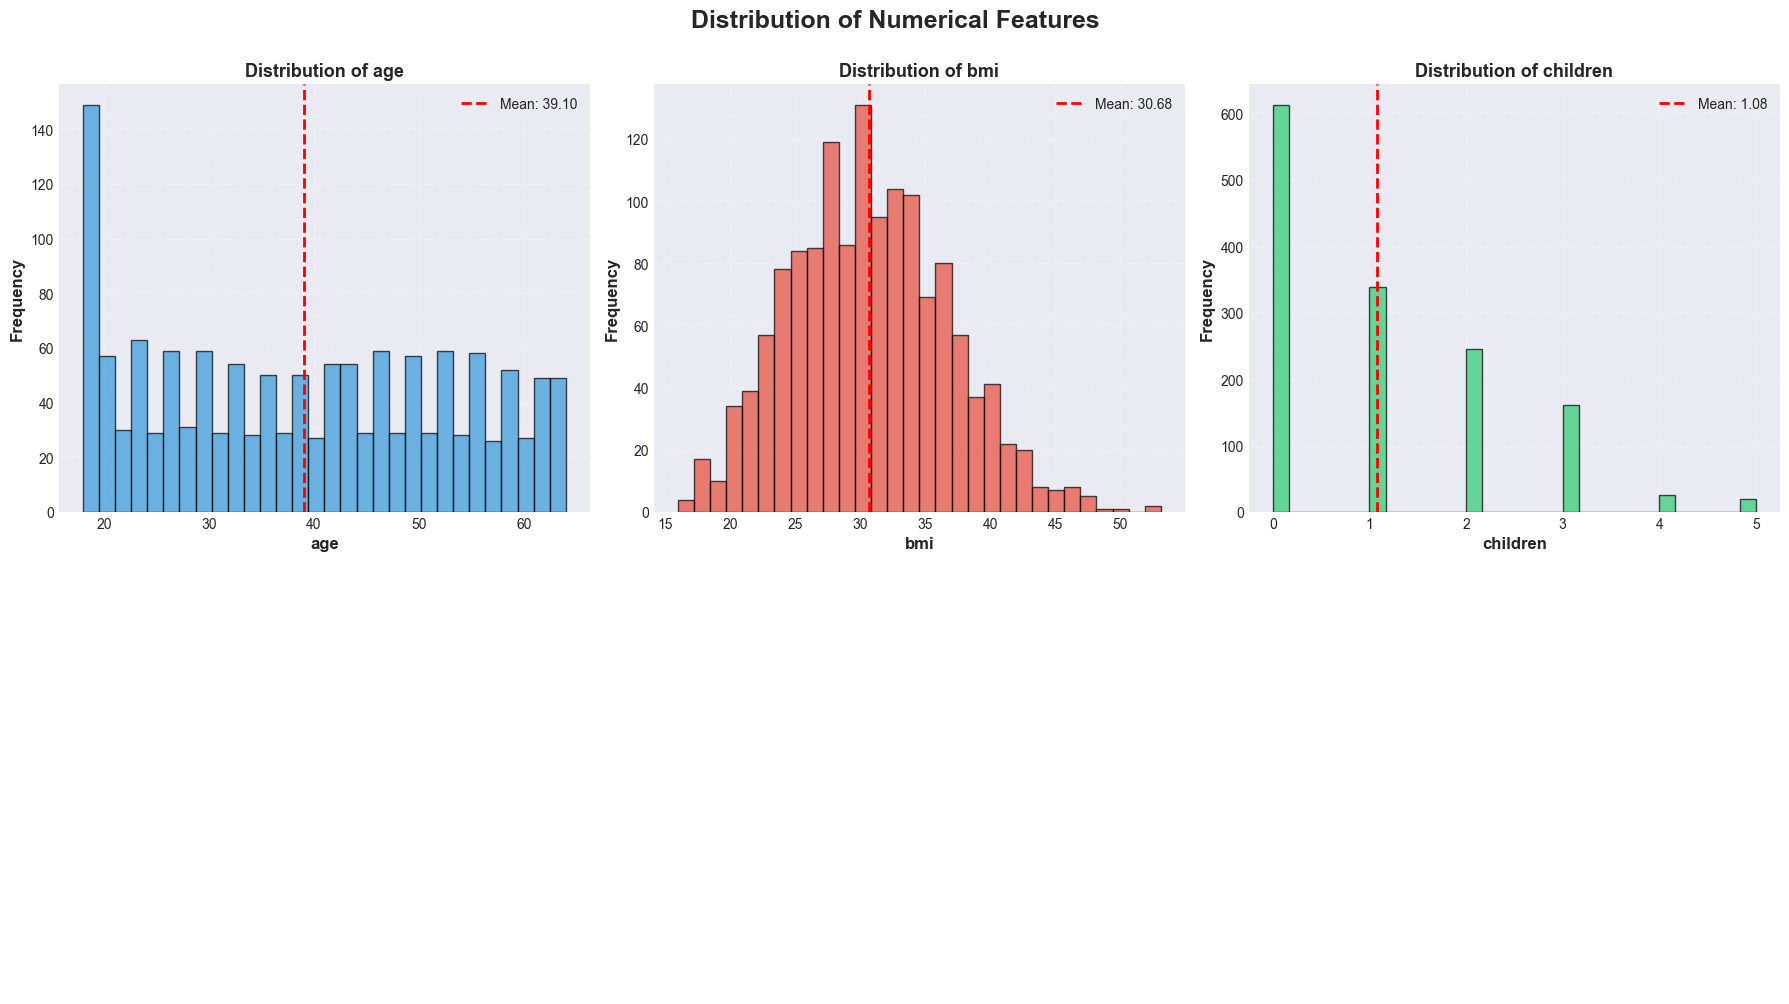

✓ Saved: plots/eda_histograms.png



In [ ]:
# EDA VISUALIZATIONS - HISTOGRAMS & BAR CHARTS
print("="*70)
print("EDA VISUALIZATIONS")
print("="*70)
print()

os.makedirs('plots', exist_ok=True)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# FIGURE 1: Histograms for Numerical Features
print("Generating histograms for numerical features...")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Numerical Features', fontsize=18, fontweight='bold', y=1.00)

# Fix: numerical_cols is already a list, no need for .tolist()
numerical_cols_list = list(numerical_cols)  # or just use numerical_cols directly
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

for idx, col in enumerate(numerical_cols_list):
    row = idx // 3
    col_idx = idx % 3
    ax = axes[row, col_idx]
    
    ax.hist(df[col], bins=30, color=colors[idx % len(colors)], edgecolor='black', alpha=0.7)
    ax.set_xlabel(col, fontsize=12, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
    ax.set_title(f'Distribution of {col}', fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Add mean line
    mean_val = df[col].mean()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.legend(fontsize=10)

# Hide empty subplots if any
for idx in range(len(numerical_cols_list), 6):
    row = idx // 3
    col_idx = idx % 3
    axes[row, col_idx].axis('off')

plt.tight_layout()
plt.savefig('plots/eda_histograms.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: plots/eda_histograms.png\n")

In [ ]:
# STEP 3: FEATURE ENGINEERING
print("="*70)
print("STEP 3: FEATURE ENGINEERING")
print("="*70)
print()
print("Applying feature engineering transformations...")
df_fe = df.copy()

# 1. Encode categorical variables
print("1. Encoding categorical variables...")

# Convert categorical to numeric for mathematical operations
df_fe['sex'] = df_fe['sex'].astype(str)  # Ensure it's string first
df_fe['sex'] = df_fe['sex'].map({'male': 1, 'female': 0})
print("   ✓ sex: male=1, female=0")

df_fe['smoker'] = df_fe['smoker'].astype(str)  # Ensure it's string first
df_fe['smoker'] = df_fe['smoker'].map({'yes': 1, 'no': 0})
print("   ✓ smoker: yes=1, no=0")

df_fe['region'] = df_fe['region'].astype(str)  # Ensure it's string first
region_dummies = pd.get_dummies(df_fe['region'], prefix='region', drop_first=True)
df_fe = pd.concat([df_fe, region_dummies], axis=1)
df_fe.drop('region', axis=1, inplace=True)
print(f"   ✓ region: One-hot encoded ({len(region_dummies.columns)} features)")

# 2. Create interaction features
print("\n2. Creating interaction features...")
df_fe['bmi_smoker'] = df_fe['bmi'] * df_fe['smoker']
print("   ✓ bmi_smoker = bmi × smoker")
df_fe['age_bmi'] = df_fe['age'] * df_fe['bmi']
print("   ✓ age_bmi = age × bmi")
df_fe['smoker_age'] = df_fe['smoker'] * df_fe['age']
print("   ✓ smoker_age = smoker × age")

# 3. Create age groups
print("\n3. Creating age groups...")
df_fe['age_group'] = pd.cut(df_fe['age'], bins=[0, 25, 40, 60, 100], labels=[0, 1, 2, 3])
df_fe['age_group'] = df_fe['age_group'].astype(int)
print("   ✓ age_group: 0-25=0, 26-40=1, 41-60=2, 60+=3")

print("\n✓ Feature engineering complete!")
print(f"Total features after engineering: {len(df_fe.columns) - 1}")
print()

STEP 3: FEATURE ENGINEERING

Applying feature engineering transformations...
1. Encoding categorical variables...
   ✓ sex: male=1, female=0
   ✓ smoker: yes=1, no=0
   ✓ region: One-hot encoded (3 features)

2. Creating interaction features...
   ✓ bmi_smoker = bmi × smoker
   ✓ age_bmi = age × bmi
   ✓ smoker_age = smoker × age

3. Creating age groups...
   ✓ age_group: 0-25=0, 26-40=1, 41-60=2, 60+=3

✓ Feature engineering complete!
Total features after engineering: 12



In [ ]:
# STEP 4: DATA PREPARATION
print("="*70)
print("STEP 4: DATA PREPARATION")
print("="*70)
print()

X = df_fe.drop('charges', axis=1)
y = df_fe['charges']

print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
print()

print("Feature names:")
for i, col in enumerate(X.columns, 1):
    print(f"  {i}. {col}")
print()

# Split data
print("Splitting data...")
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"✓ Training:   {len(X_train):4d} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"✓ Validation: {len(X_val):4d} samples ({len(X_val)/len(X)*100:.1f}%)")
print(f"✓ Test:       {len(X_test):4d} samples ({len(X_test)/len(X)*100:.1f}%)")
print()

# Feature scaling
print("Applying StandardScaler...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
print("✓ Features scaled (mean=0, std=1)")
print()

STEP 4: DATA PREPARATION

Features (X): (1403, 12)
Target (y): (1403,)

Feature names:
  1. age
  2. sex
  3. bmi
  4. children
  5. smoker
  6. region_northwest
  7. region_southeast
  8. region_southwest
  9. bmi_smoker
  10. age_bmi
  11. smoker_age
  12. age_group

Splitting data...
✓ Training:    982 samples (70.0%)
✓ Validation:  210 samples (15.0%)
✓ Test:        211 samples (15.0%)

Applying StandardScaler...
✓ Features scaled (mean=0, std=1)



In [ ]:
# STEP 5: MODEL TRAINING
print("="*70)
print("STEP 5: TRAINING MODELS")
print("="*70)
print()

results = {}

def evaluate_model(model, X_tr, y_tr, X_val, y_val, X_te, y_te):
    y_tr_pred = model.predict(X_tr)
    y_val_pred = model.predict(X_val)
    y_te_pred = model.predict(X_te)
    
    train_r2 = r2_score(y_tr, y_tr_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    test_r2 = r2_score(y_te, y_te_pred)
    
    train_mse = mean_squared_error(y_tr, y_tr_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)
    test_mse = mean_squared_error(y_te, y_te_pred)
    
    train_rmse = np.sqrt(train_mse)
    val_rmse = np.sqrt(val_mse)
    test_rmse = np.sqrt(test_mse)
    
    train_mae = mean_absolute_error(y_tr, y_tr_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    test_mae = mean_absolute_error(y_te, y_te_pred)
    
    return {
        'train': {'r2': train_r2, 'mse': train_mse, 'rmse': train_rmse, 'mae': train_mae, 'pred': y_tr_pred},
        'val': {'r2': val_r2, 'mse': val_mse, 'rmse': val_rmse, 'mae': val_mae, 'pred': y_val_pred},
        'test': {'r2': test_r2, 'mse': test_mse, 'rmse': test_rmse, 'mae': test_mae, 'pred': y_te_pred}
    }

# ============================================================================
# [1/3] LINEAR REGRESSION
# ============================================================================
print("[1/3] LINEAR REGRESSION")
print("-"*70)
print()

print("Step 1: Splitting data (70% train, 15% validation, 15% test)...")
X_train_lr, X_temp_lr, y_train_lr, y_temp_lr = train_test_split(
    X, y, test_size=0.3, random_state=42
)
X_val_lr, X_test_lr, y_val_lr, y_test_lr = train_test_split(
    X_temp_lr, y_temp_lr, test_size=0.5, random_state=42
)
print(f"  ✓ Training:   {len(X_train_lr)} samples")
print(f"  ✓ Validation: {len(X_val_lr)} samples")
print(f"  ✓ Test:       {len(X_test_lr)} samples")
print()

print("Step 2: Separating features and target...")
print(f"  ✓ Features (X): {X_train_lr.shape[1]} columns")
print(f"  ✓ Target (y): charges")
print()

print("Step 3: Scaling features (StandardScaler)...")
scaler_lr = StandardScaler()
X_train_lr_scaled = scaler_lr.fit_transform(X_train_lr)
X_val_lr_scaled = scaler_lr.transform(X_val_lr)
X_test_lr_scaled = scaler_lr.transform(X_test_lr)
print(f"  ✓ Features scaled to mean=0, std=1")
print()

print("Step 4: Training Linear Regression model...")
lin_model = LinearRegression()
lin_model.fit(X_train_lr_scaled, y_train_lr)
print("  ✓ Model trained successfully!")
print()

print("Step 5: Evaluating model performance...")
lin_results = evaluate_model(
    lin_model, X_train_lr_scaled, y_train_lr, 
    X_val_lr_scaled, y_val_lr, X_test_lr_scaled, y_test_lr
)
print()

print("FINAL RESULTS:")
print(f"  Training Set:")
print(f"    • R² Score: {lin_results['train']['r2']:.4f} ({lin_results['train']['r2']*100:.2f}%)")
print(f"    • RMSE:     ${lin_results['train']['rmse']:.2f}")
print(f"    • MAE:      ${lin_results['train']['mae']:.2f}")
print()
print(f"  Validation Set:")
print(f"    • R² Score: {lin_results['val']['r2']:.4f} ({lin_results['val']['r2']*100:.2f}%)")
print(f"    • RMSE:     ${lin_results['val']['rmse']:.2f}")
print(f"    • MAE:      ${lin_results['val']['mae']:.2f}")
print()
print(f"  Test Set:")
print(f"    • R² Score: {lin_results['test']['r2']:.4f} ({lin_results['test']['r2']*100:.2f}%)")
print(f"    • RMSE:     ${lin_results['test']['rmse']:.2f}")
print(f"    • MAE:      ${lin_results['test']['mae']:.2f}")
print()

results['Linear Regression'] = lin_results

# ============================================================================
# [2/3] RIDGE REGRESSION (with epochs)
# ============================================================================
print("[2/3] RIDGE REGRESSION")
print("-"*70)
print()

EPOCHS = 50
ridge_train_r2, ridge_val_r2 = [], []
ridge_train_loss, ridge_val_loss = [], []
ridge_train_rmse, ridge_val_rmse = [], []

print(f"Training Ridge Regression with {EPOCHS} different alpha values...")
alphas = np.logspace(-3, 3, EPOCHS)

for i, alpha in enumerate(alphas, 1):
    ridge_model = Ridge(alpha=alpha, random_state=42)
    ridge_model.fit(X_train_scaled, y_train)
    
    y_train_pred = ridge_model.predict(X_train_scaled)
    y_val_pred = ridge_model.predict(X_val_scaled)
    
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)
    train_rmse = np.sqrt(train_mse)
    val_rmse = np.sqrt(val_mse)
    
    ridge_train_r2.append(train_r2)
    ridge_val_r2.append(val_r2)
    ridge_train_loss.append(train_mse)
    ridge_val_loss.append(val_mse)
    ridge_train_rmse.append(train_rmse)
    ridge_val_rmse.append(val_rmse)
    
    if i % 10 == 0 or i == 1:
        print(f"  Iteration {i:2d} | Alpha: {alpha:8.4f} | Train R²: {train_r2:.4f} | Val R²: {val_r2:.4f} | Val RMSE: ${val_rmse:.2f}")

# Train final model with best alpha
best_idx = np.argmin(ridge_val_rmse)
best_alpha = alphas[best_idx]
ridge_model = Ridge(alpha=best_alpha, random_state=42)
ridge_model.fit(X_train_scaled, y_train)

ridge_results = evaluate_model(
    ridge_model, X_train_scaled, y_train, 
    X_val_scaled, y_val, X_test_scaled, y_test
)
print()
print(f"Best alpha: {best_alpha:.4f}")
print()
print("FINAL RESULTS:")
print(f"  Test R²:    {ridge_results['test']['r2']:.4f} ({ridge_results['test']['r2']*100:.2f}%)")
print(f"  Test RMSE:  ${ridge_results['test']['rmse']:.2f}")
print(f"  Test MAE:   ${ridge_results['test']['mae']:.2f}")
print()

ridge_results['train_r2_history'] = ridge_train_r2
ridge_results['val_r2_history'] = ridge_val_r2
ridge_results['train_loss_history'] = ridge_train_loss
ridge_results['val_loss_history'] = ridge_val_loss
ridge_results['train_rmse_history'] = ridge_train_rmse
ridge_results['val_rmse_history'] = ridge_val_rmse

results['Ridge Regression'] = ridge_results

# ============================================================================
# [3/3] RANDOM FOREST (with epochs)
# ============================================================================
print("[3/3] RANDOM FOREST")
print("-"*70)
print()

rf_train_r2, rf_val_r2 = [], []
rf_train_loss, rf_val_loss = [], []
rf_train_rmse, rf_val_rmse = [], []

print(f"Training Random Forest with {EPOCHS} estimators...")

for n_trees in range(1, EPOCHS + 1):
    rf_model = RandomForestRegressor(
        n_estimators=n_trees, random_state=42, max_depth=15, n_jobs=-1
    )
    rf_model.fit(X_train_scaled, y_train)
    
    y_train_pred = rf_model.predict(X_train_scaled)
    y_val_pred = rf_model.predict(X_val_scaled)
    
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)
    train_rmse = np.sqrt(train_mse)
    val_rmse = np.sqrt(val_mse)
    
    rf_train_r2.append(train_r2)
    rf_val_r2.append(val_r2)
    rf_train_loss.append(train_mse)
    rf_val_loss.append(val_mse)
    rf_train_rmse.append(train_rmse)
    rf_val_rmse.append(val_rmse)
    
    if n_trees % 10 == 0 or n_trees == 1:
        print(f"  Trees: {n_trees:2d} | Train R²: {train_r2:.4f} | Val R²: {val_r2:.4f} | Val RMSE: ${val_rmse:.2f}")

# Train final model
rf_model = RandomForestRegressor(
    n_estimators=EPOCHS, random_state=42, max_depth=15, n_jobs=-1
)
rf_model.fit(X_train_scaled, y_train)

rf_results = evaluate_model(
    rf_model, X_train_scaled, y_train, 
    X_val_scaled, y_val, X_test_scaled, y_test
)
print()
print("FINAL RESULTS:")
print(f"  Test R²:    {rf_results['test']['r2']:.4f} ({rf_results['test']['r2']*100:.2f}%)")
print(f"  Test RMSE:  ${rf_results['test']['rmse']:.2f}")
print(f"  Test MAE:   ${rf_results['test']['mae']:.2f}")
print()

rf_results['train_r2_history'] = rf_train_r2
rf_results['val_r2_history'] = rf_val_r2
rf_results['train_loss_history'] = rf_train_loss
rf_results['val_loss_history'] = rf_val_loss
rf_results['train_rmse_history'] = rf_train_rmse
rf_results['val_rmse_history'] = rf_val_rmse

results['Random Forest'] = rf_results

print("="*70)
print("✓ ALL MODELS TRAINED!")
print("="*70)
print()

STEP 5: TRAINING MODELS

[1/3] LINEAR REGRESSION
----------------------------------------------------------------------

Step 1: Splitting data (70% train, 15% validation, 15% test)...
  ✓ Training:   982 samples
  ✓ Validation: 210 samples
  ✓ Test:       211 samples

Step 2: Separating features and target...
  ✓ Features (X): 12 columns
  ✓ Target (y): charges

Step 3: Scaling features (StandardScaler)...
  ✓ Features scaled to mean=0, std=1

Step 4: Training Linear Regression model...
  ✓ Model trained successfully!

Step 5: Evaluating model performance...

FINAL RESULTS:
  Training Set:
    • R² Score: 0.8378 (83.78%)
    • RMSE:     $4896.80
    • MAE:      $2955.77

  Validation Set:
    • R² Score: 0.7662 (76.62%)
    • RMSE:     $6623.25
    • MAE:      $3385.45

  Test Set:
    • R² Score: 0.8419 (84.19%)
    • RMSE:     $4235.46
    • MAE:      $2610.97

[2/3] RIDGE REGRESSION
----------------------------------------------------------------------

Training Ridge Regression wi

In [ ]:
# STEP 6: MODEL COMPARISON
print("="*70)
print("STEP 6: MODEL COMPARISON")
print("="*70)
print()

comparison_data = []
for model_name, model_results in results.items():
    comparison_data.append({
        'Model': model_name,
        'Test R²': f"{model_results['test']['r2']:.4f}",
        'Test R² %': f"{model_results['test']['r2']*100:.2f}%",
        'Test RMSE': f"${model_results['test']['rmse']:.2f}",
        'Test MAE': f"${model_results['test']['mae']:.2f}"
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))
print()

best_model_name = max(results.keys(), key=lambda x: results[x]['test']['r2'])
best_r2 = results[best_model_name]['test']['r2']
print(f" BEST MODEL: {best_model_name}")
print(f"   Test R²: {best_r2:.4f} ({best_r2*100:.2f}%)")
print(f"   Test RMSE: ${results[best_model_name]['test']['rmse']:.2f}")
print(f"   Test MAE: ${results[best_model_name]['test']['mae']:.2f}")
print()

STEP 6: MODEL COMPARISON

            Model Test R² Test R² % Test RMSE Test MAE
Linear Regression  0.8419    84.19%  $4235.46 $2610.97
 Ridge Regression  0.8416    84.16%  $4239.76 $2660.25
    Random Forest  0.8770    87.70%  $3735.45 $1964.24

 BEST MODEL: Random Forest
   Test R²: 0.8770 (87.70%)
   Test RMSE: $3735.45
   Test MAE: $1964.24



STEP 7: GENERATING TRAINING CURVES

Generating Accuracy Curve...


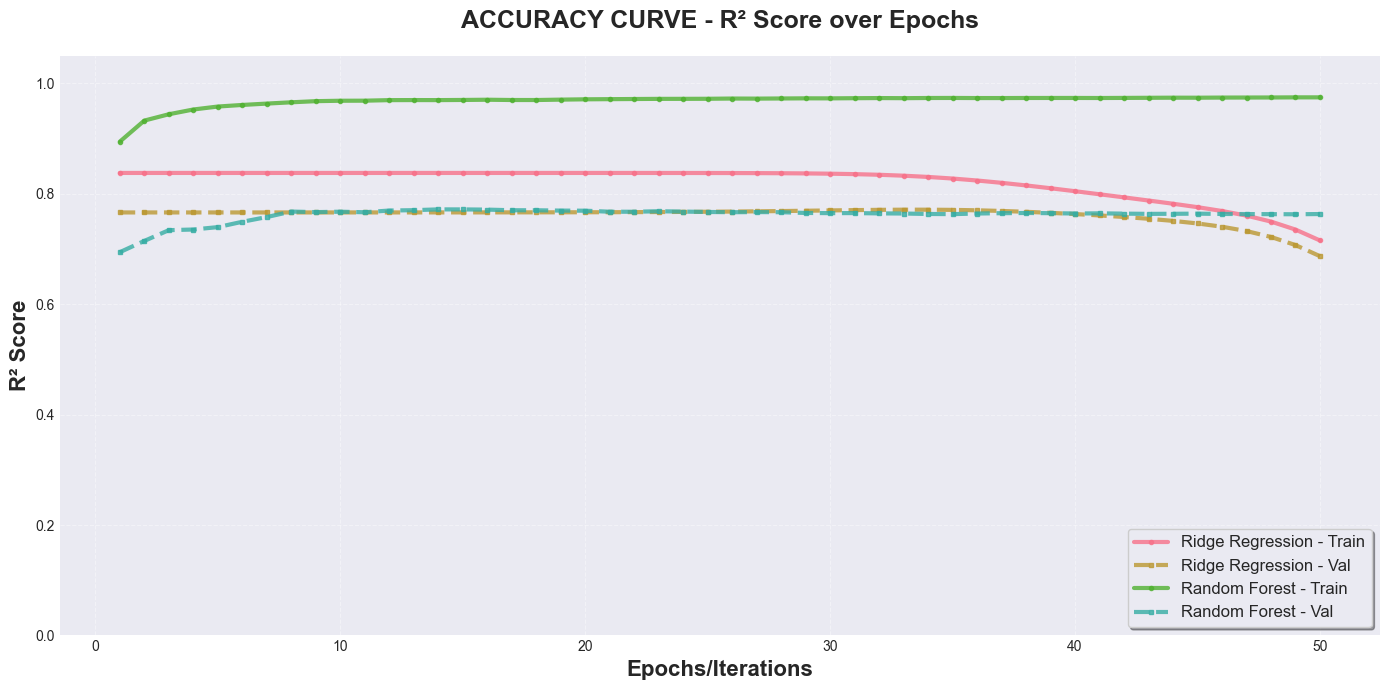

✓ Saved: plots/accuracy_curve.png

✓ ACCURACY CURVE GENERATED!



In [ ]:
# STEP 7: TRAINING CURVES
print("="*70)
print("STEP 7: GENERATING TRAINING CURVES")
print("="*70)
print()

# Define epochs range
EPOCHS = 50
epochs_range = list(range(1, EPOCHS + 1))

# CURVE 1: ACCURACY CURVE (R² Score)
print("Generating Accuracy Curve...")
fig, ax = plt.subplots(figsize=(14, 7))

for model_name in results.keys():
    # Skip Linear Regression as it doesn't have epoch history
    if model_name == 'Linear Regression':
        continue
    
    ax.plot(epochs_range, results[model_name]['train_r2_history'], 
            label=f'{model_name} - Train', linewidth=3, alpha=0.8, marker='o', markersize=3)
    ax.plot(epochs_range, results[model_name]['val_r2_history'], 
            label=f'{model_name} - Val', linewidth=3, linestyle='--', alpha=0.8, marker='s', markersize=3)

ax.set_xlabel('Epochs/Iterations', fontsize=16, fontweight='bold')
ax.set_ylabel('R² Score', fontsize=16, fontweight='bold')
ax.set_title('ACCURACY CURVE - R² Score over Epochs', fontsize=18, fontweight='bold', pad=20)
ax.legend(fontsize=12, loc='lower right', frameon=True, shadow=True)
ax.grid(True, alpha=0.4, linestyle='--')
ax.set_ylim([0, 1.05])
plt.tight_layout()
plt.savefig('plots/accuracy_curve.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: plots/accuracy_curve.png\n")

print("="*70)
print("✓ ACCURACY CURVE GENERATED!")
print("="*70)
print()

Generating Validation Graph...


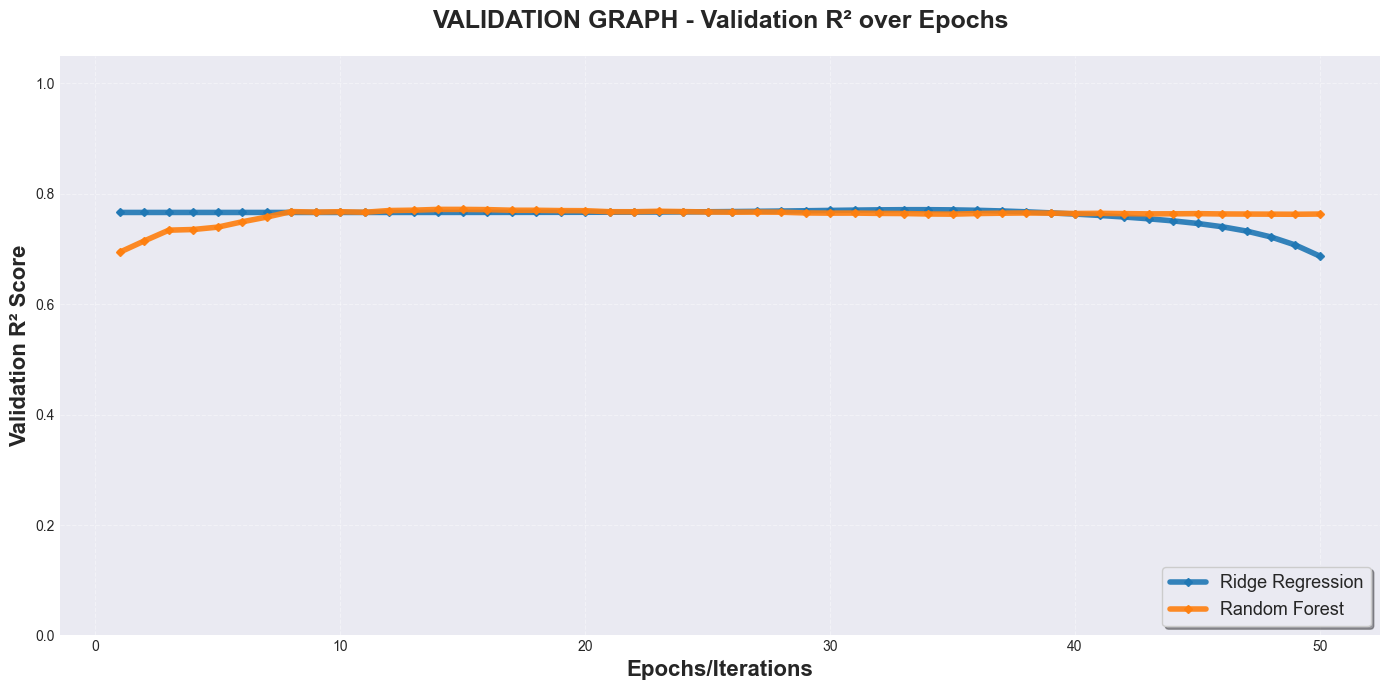

✓ Saved: plots/validation_graph.png



In [ ]:
# CURVE 2: VALIDATION GRAPH
print("Generating Validation Graph...")
fig, ax = plt.subplots(figsize=(14, 7))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
idx = 0

for model_name in results.keys():
    # Skip Linear Regression as it doesn't have epoch history
    if model_name == 'Linear Regression':
        continue
    
    ax.plot(epochs_range, results[model_name]['val_r2_history'], 
            label=f'{model_name}', linewidth=4, alpha=0.9, 
            marker='D', markersize=4, color=colors[idx])
    idx += 1

ax.set_xlabel('Epochs/Iterations', fontsize=16, fontweight='bold')
ax.set_ylabel('Validation R² Score', fontsize=16, fontweight='bold')
ax.set_title('VALIDATION GRAPH - Validation R² over Epochs', fontsize=18, fontweight='bold', pad=20)
ax.legend(fontsize=13, loc='lower right', frameon=True, shadow=True)
ax.grid(True, alpha=0.4, linestyle='--')
ax.set_ylim([0, 1.05])
plt.tight_layout()
plt.savefig('plots/validation_graph.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: plots/validation_graph.png\n")

Generating Loss Graph...


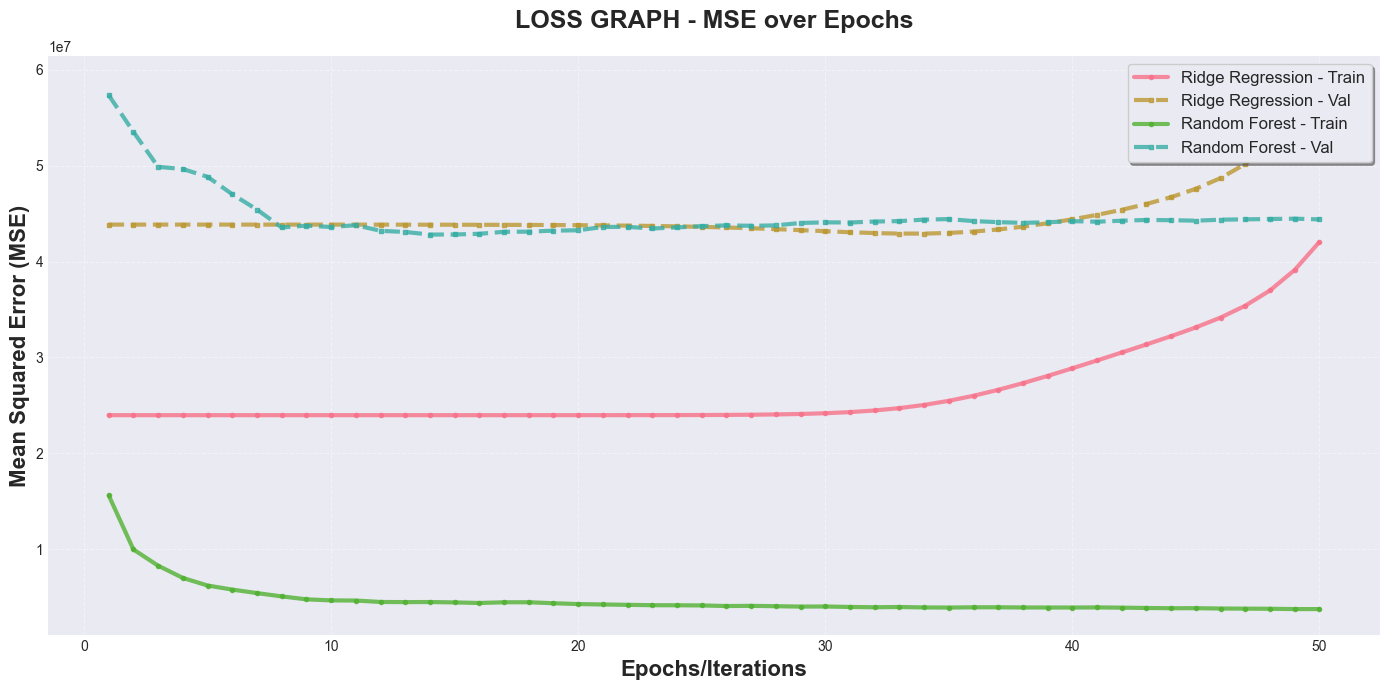

✓ Saved: plots/loss_graph.png



In [ ]:
# CURVE 3: LOSS GRAPH
print("Generating Loss Graph...")
fig, ax = plt.subplots(figsize=(14, 7))

for model_name in results.keys():
    # Skip Linear Regression as it doesn't have epoch history
    if model_name == 'Linear Regression':
        continue
    
    ax.plot(epochs_range, results[model_name]['train_loss_history'], 
            label=f'{model_name} - Train', linewidth=3, alpha=0.8, marker='o', markersize=3)
    ax.plot(epochs_range, results[model_name]['val_loss_history'], 
            label=f'{model_name} - Val', linewidth=3, linestyle='--', alpha=0.8, marker='s', markersize=3)

ax.set_xlabel('Epochs/Iterations', fontsize=16, fontweight='bold')
ax.set_ylabel('Mean Squared Error (MSE)', fontsize=16, fontweight='bold')
ax.set_title('LOSS GRAPH - MSE over Epochs', fontsize=18, fontweight='bold', pad=20)
ax.legend(fontsize=12, loc='upper right', frameon=True, shadow=True)
ax.grid(True, alpha=0.4, linestyle='--')
plt.tight_layout()
plt.savefig('plots/loss_graph.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: plots/loss_graph.png\n")

Generating Error Distribution...


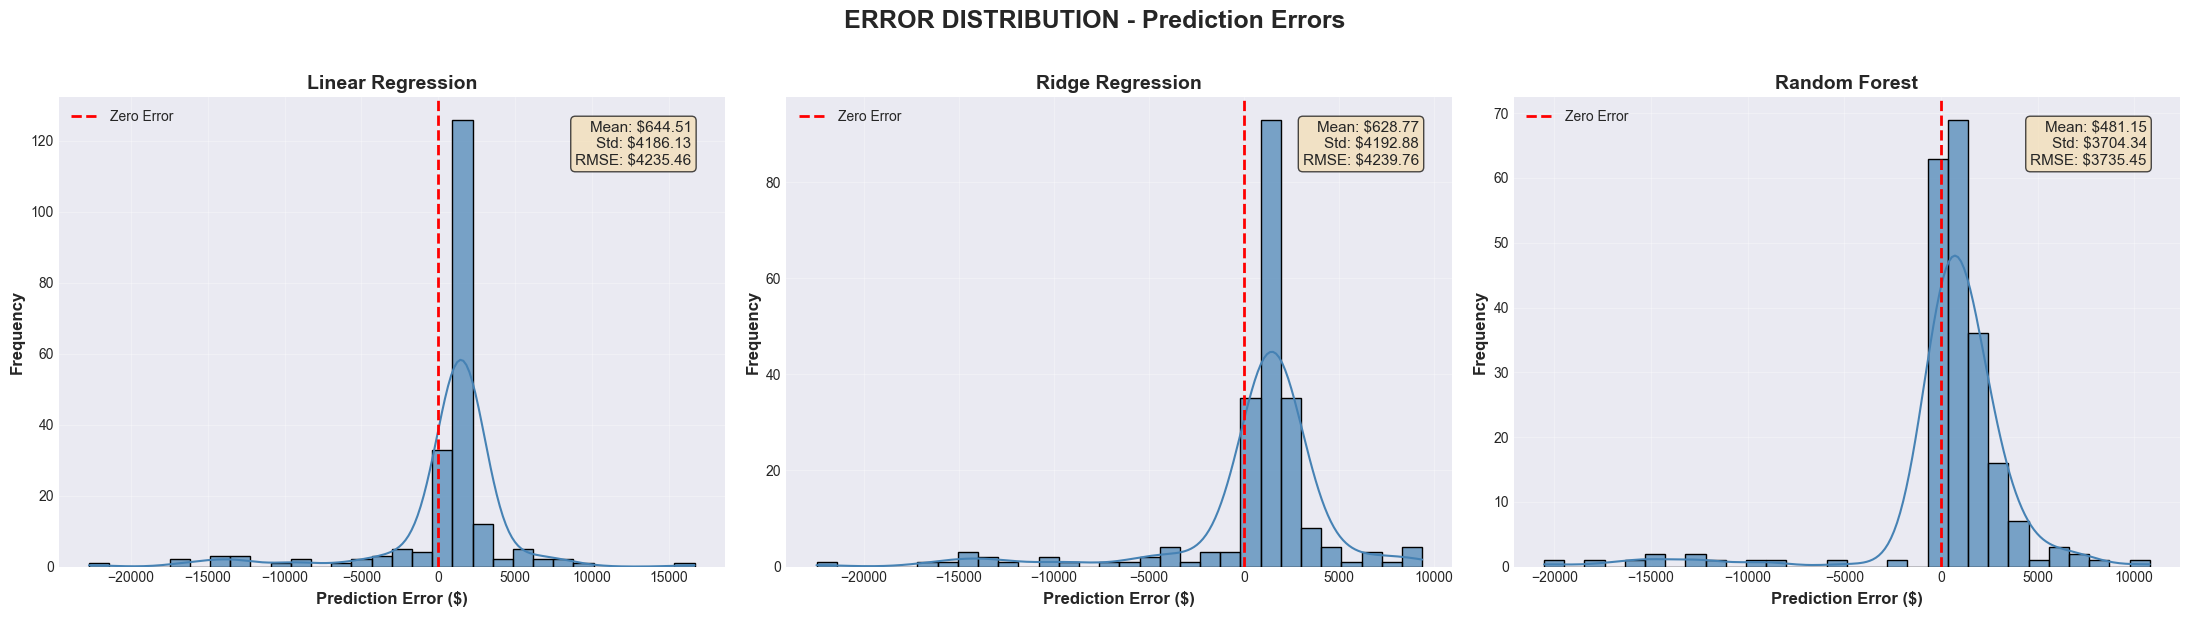

✓ Saved: plots/error_distribution.png



In [ ]:
# CURVE 4: ERROR DISTRIBUTION (Histogram + KDE)
print("Generating Error Distribution...")
fig, axes = plt.subplots(1, 3, figsize=(22, 6))
fig.suptitle('ERROR DISTRIBUTION - Prediction Errors', fontsize=18, fontweight='bold', y=1.02)

models = ["Linear Regression", "Ridge Regression", "Random Forest"]

for ax, model_name in zip(axes, models):
    y_true = y_test_lr  # Use the test set from Linear Regression split
    y_pred = results[model_name]['test']['pred']
    errors = y_pred - y_true
    
    # Histogram with KDE
    sns.histplot(errors, bins=30, kde=True, ax=ax, color="steelblue", alpha=0.7)
    
    # Zero-error reference line
    ax.axvline(0, color="red", linestyle="--", linewidth=2, label="Zero Error")
    
    # Titles & labels
    ax.set_title(f"{model_name}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Prediction Error ($)", fontsize=12, fontweight='bold')
    ax.set_ylabel("Frequency", fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=10)
    
    # Stats box
    mean_err = np.mean(errors)
    std_err = np.std(errors)
    rmse = results[model_name]['test']['rmse']
    ax.text(0.95, 0.95,
            f"Mean: ${mean_err:.2f}\nStd: ${std_err:.2f}\nRMSE: ${rmse:.2f}",
            transform=ax.transAxes,
            fontsize=11,
            verticalalignment='top',
            horizontalalignment='right',
            bbox=dict(facecolor="wheat", alpha=0.7, boxstyle='round'))

plt.tight_layout()
plt.savefig("plots/error_distribution.png", dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: plots/error_distribution.png\n")

In [ ]:
# FINAL SUMMARY
print("="*70)
print("FINAL SUMMARY")
print("="*70)
print()
print("TEST RESULTS:")
for model_name, model_results in results.items():
    print(f"\n{model_name}:")
    print(f"   R² Score:  {model_results['test']['r2']:.4f} ({model_results['test']['r2']*100:.2f}%)")
    print(f"   RMSE:      ${model_results['test']['rmse']:.2f}")
    print(f"   MAE:       ${model_results['test']['mae']:.2f}")

print(f"\n BEST MODEL: {best_model_name}")
print(f"   Achieved {best_r2*100:.2f}% accuracy")

print("\n SAVED FILES:")
print("   ✓ plots/accuracy_curve.png")
print("   ✓ plots/loss_graph.png")
print("   ✓ plots/validation_graph.png")
print("   ✓ plots/error_distribution.png")

print("\n" + "="*70)
print(" TRAINING COMPLETE!")
print("="*70)

FINAL SUMMARY

TEST RESULTS:

Linear Regression:
   R² Score:  0.8419 (84.19%)
   RMSE:      $4235.46
   MAE:       $2610.97

Ridge Regression:
   R² Score:  0.8416 (84.16%)
   RMSE:      $4239.76
   MAE:       $2660.25

Random Forest:
   R² Score:  0.8770 (87.70%)
   RMSE:      $3735.45
   MAE:       $1964.24

 BEST MODEL: Random Forest
   Achieved 87.70% accuracy

 SAVED FILES:
   ✓ plots/accuracy_curve.png
   ✓ plots/loss_graph.png
   ✓ plots/validation_graph.png
   ✓ plots/error_distribution.png

 TRAINING COMPLETE!
